#### Import required libraries and disable warnings

In [546]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

# 1. Understanding data

### a. Loading data

In [550]:
data = pd.read_csv('loan.csv')
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### b. Shape of data

In [552]:
print("rows=", data.shape[0])
print("cols=", data.shape[1])

rows= 39717
cols= 111


###### We have 39717 rows and 111 columns

### c. Description of data

In [557]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [559]:
# We can observe that many columns have null values
# Check the columns which have null values along with its sum.
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

#### We can observe that there are some columns which have null values. Since they don't contribute to the analysis we will remove them later in the data cleaning step

# 2. Cleaning data

### a. Deleting columns which have only null values present

In [564]:
total_len = len(data)
print("Number of columns which have all values as NA: ", len(data.columns[data.isna().all()].tolist()))

Number of columns which have all values as NA:  54


In [566]:
# We have total 54 columns which have null value. So we need to delete them as they will not help us in any analysis
data.dropna(axis = 1, how = 'all', inplace = True)
#data.head()

### b. Delete entries for which the loan_status is current as the people who are already paying loan doesn't contribute to the analysis. We are only interested in **Fully Paid** or **Charged Off**

In [569]:
total_len = len(data)
data = data[data['loan_status'] != 'Current']
new_len = len(data)
data.shape

(38577, 57)

In [571]:
print ("% of rows removed = ", ((total_len-new_len) / total_len )*100)

% of rows removed =  2.8703074250321023


### c. Removing columns which have only single values. (i.e all values are same)

In [574]:
# There are columns which have all the values same. We will discard those columns as these columns will not helps us in analysis.
# To verify this we can quickly open the csv in excel and verif this fact using filter

In [576]:
columns = ['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',  'policy_code', 'application_type', 
           'acc_now_delinq', 'delinq_amnt', 'tax_liens']
data.drop(columns, axis = 1, inplace = True)
#data.head()

In [578]:
print(data.columns)
print(len(data.columns))

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'chargeoff_within_12_mths',
       'pub_rec_bankruptcies'],
      dtype='object')
49


In [580]:
# Deleting the rows which is having all columns values as na.
data = data.dropna(axis=0, how="all")
data.shape

(38577, 49)

### d. Removing columns which are post approval features

In [583]:
# There are some columns which are post approval features.
# columns like "out_prncp_inv" , "total_pymnt_inv" etc not contributing to our analysis and are useful for investors.
columns = ['delinq_2yrs', 'earliest_cr_line', 'last_pymnt_amnt','inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util',
           'total_acc','out_prncp', 'out_prncp_inv', 'total_pymnt','total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 
           'total_rec_late_fee', 'recoveries', 'collection_recovery_fee','last_pymnt_d','last_credit_pull_d', 'mths_since_last_delinq',
           'mths_since_last_record' ,'chargeoff_within_12_mths' 
          ]
#'pub_rec_bankruptcies', 'pub_rec'
data.drop(columns, axis = 1, inplace = True)


In [585]:
print(data.columns)
print (len(data.columns))

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'pub_rec', 'next_pymnt_d', 'pub_rec_bankruptcies'],
      dtype='object')
27


In [587]:
# If we observe the columns values then we can see that the column: id, member_id, zip_code are the data which are not of much use.

data.drop(['id' ,'member_id', 'zip_code'], inplace=True, axis =1 )
#data.head()
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'url', 'desc', 'purpose', 'title', 'addr_state', 'dti',
       'pub_rec', 'next_pymnt_d', 'pub_rec_bankruptcies'],
      dtype='object')

### e. Removing the columns which have string data and are not of any use. 

In [590]:
# We can observe that there are some columns which have string as data. For example columns like 
# emp_title, url, desc, purpose, title doesn't make sense much.
# So we can safely delete these columns.

columns = ['desc', 'title', 'emp_title', 'url']
data.drop(columns, inplace=True, axis =1 )
#data.head()

In [592]:
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'pub_rec', 'next_pymnt_d',
       'pub_rec_bankruptcies'],
      dtype='object')

# 3. Data modification

### a. Handle missing values

In [596]:
# Lets look at the columns which has missing values. Below code prints the % of rows which has missing values for each columns.
(data.isna().sum()/len(data))*100

loan_amnt                 0.000000
funded_amnt               0.000000
funded_amnt_inv           0.000000
term                      0.000000
int_rate                  0.000000
installment               0.000000
grade                     0.000000
sub_grade                 0.000000
emp_length                2.677761
home_ownership            0.000000
annual_inc                0.000000
verification_status       0.000000
issue_d                   0.000000
loan_status               0.000000
purpose                   0.000000
addr_state                0.000000
dti                       0.000000
pub_rec                   0.000000
next_pymnt_d            100.000000
pub_rec_bankruptcies      1.806776
dtype: float64

##### We can observe that column `emp_length` 2.67% of rows value missing values. So we need to either remove them or impute them.
##### We also observed that column `next_pymnt_d` has 100% missing values. So we can safely delete this column.
##### Column `pub_rec_bankruptcies` also has 1.8% missing values.
##### Since the columns which has NA values are very less, we can remove the rows which has Na values for these columns.

In [599]:
# remove column 
data.drop(['next_pymnt_d'], inplace=True, axis =1 )

In [601]:
# remove rows from data which has columns emp_length , pub_rec_bankruptcies as NA
orig_len = len(data)
data = data[  data['emp_length'].notna() ]
data = data[  data['pub_rec_bankruptcies'].notna() ]

new_len = len(data)

In [603]:
print("% of rows deleted= ", ((orig_len-new_len)*100)/orig_len )

% of rows deleted=  4.484537418669155


In [605]:
# Reverifying the null values percentage
(data.isna().sum()/len(data.index))*100

loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
addr_state              0.0
dti                     0.0
pub_rec                 0.0
pub_rec_bankruptcies    0.0
dtype: float64

### b. Modifying values

In [608]:
# Lets look at the data types for the columns. We can observe that some columns like term , int_rate , emp_length should
# be of int type but are of object dtype
data.dtypes 

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
pub_rec                   int64
pub_rec_bankruptcies    float64
dtype: object

In [610]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,0.0


In [612]:
data.emp_length.value_counts()

emp_length
10+ years    8369
< 1 year     4341
2 years      4207
3 years      3951
4 years      3297
5 years      3161
1 year       3077
6 years      2136
7 years      1689
8 years      1410
9 years      1209
Name: count, dtype: int64

In [614]:
# Look at the above rows. We can see that 
# a. term: has string 'months' as the part of the string. We can remove the string "term" and keep the numerical part as int dtype
# b. int_rate : has % at the part of data. We need to get rid of that.
# c. emp_length : this has values as '10+ years' and '< 1' years. We can modify this as below:
#     '10+ years' as 10   => 10+ years is assumed as 10
#     '< 1' as 0   ==> (< 1 year) is assumed as 0

In [616]:
# Performing operation a
def RemoveMonthsString(val):
    val = int(val.strip().split()[0])
    return val
data['term'] = data['term'].apply(RemoveMonthsString)
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,0.0
1,2500,2500,2500.0,60,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,0.0
2,2400,2400,2400.0,36,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,0.0
3,10000,10000,10000.0,36,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,0.0
5,5000,5000,5000.0,36,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,0.0


In [618]:
# Performing operation b
def RemovePercentString(val):
    return float(val.strip('%'))

data['int_rate'] = data['int_rate'].apply(RemovePercentString)
#data.head()

In [620]:
# Performing operation c
def ModifyEmpLength(val):
    val = val.strip().strip('years')
    val = val.strip().strip('year')
    if val == "10+":
        val = 10
    elif val ==  "< 1":
        val = 0
    else:
        val = int(val)
    return val

data['emp_length'] = data['emp_length'].apply(ModifyEmpLength)

In [622]:
#data.head()
#data.emp_length.value_counts()

In [624]:
data.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                      int64
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length                int64
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
pub_rec                   int64
pub_rec_bankruptcies    float64
dtype: object

### c. Deriving columns

In [627]:
# We can see that coluns issue_d is having data as MONTH-Year format.
# So we can derive month and year as seperate columns from this for better analysis

In [629]:
data['issue_month'] = pd.to_datetime(data['issue_d'], format='%b-%y').dt.month
data['issue_year'] = pd.to_datetime(data['issue_d'], format='%b-%y').dt.year

In [631]:
#data.head()
data.shape

(36847, 21)

### d. Handling outliers

#### i. Plotting box plot for the numerical columns

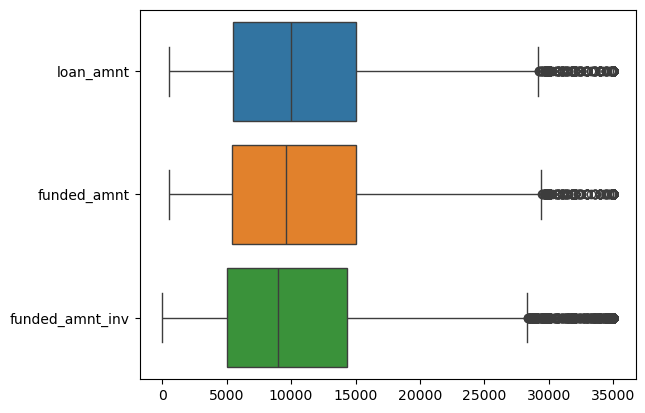

In [635]:
sns.boxplot([data['loan_amnt'], data['funded_amnt'], data['funded_amnt_inv']], orient="h")
plt.show()

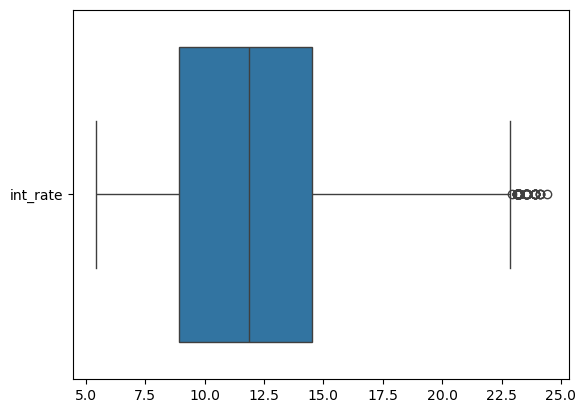

In [636]:
sns.boxplot([data['int_rate']], orient="h")
plt.show()

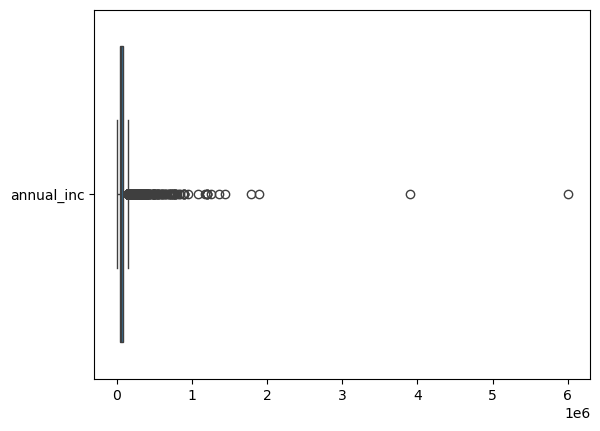

In [637]:
sns.boxplot([data['annual_inc']], orient="h")
plt.show()

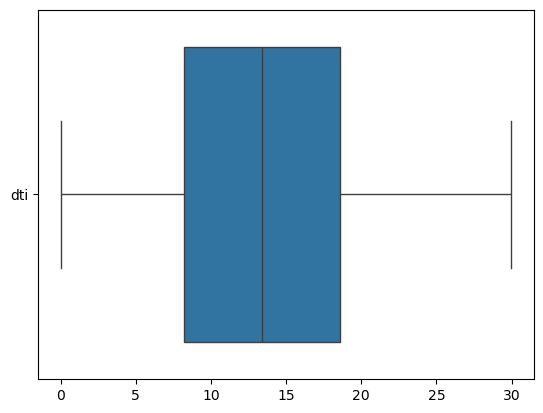

In [639]:
sns.boxplot([data['dti']], orient="h")
plt.show()

#### ii. Removing outliers by IQR method

#### We can see that there are outliers present in the data for almost all the numerical columns except dti
- Lets use IQR method to handle outliers in the data using threshold as 1.5
- Reason : The IQR focuses on the middle 50% of the data (the range between the first quartile, Q1, and the third quartile, Q3). This means it is less influenced by extreme values or outliers, making it a robust measure of variability.

In [642]:
def RemoveOutliersByIQR(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3-Q1
    low = Q1 - 1.5 * IQR
    high = Q3 + 1.5 * IQR
    data = data [ (data[column] >= low) & (data[column] <= high) ]
    return data

columns = [ 'annual_inc', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment' ]
for col in columns:
    data = RemoveOutliersByIQR(data, col)
data.shape

(33193, 21)

#### Lets verify box plot once again

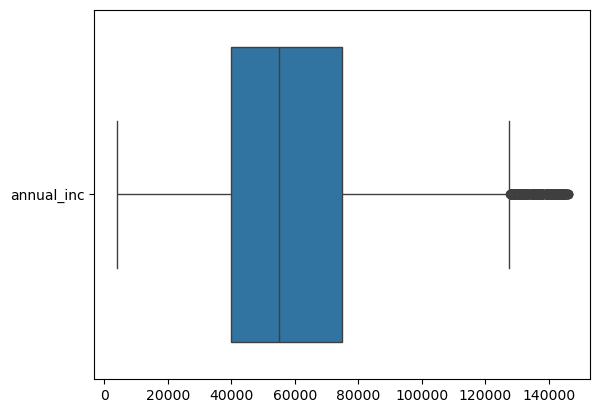

In [646]:

sns.boxplot([data['annual_inc']], orient="h")
plt.show()

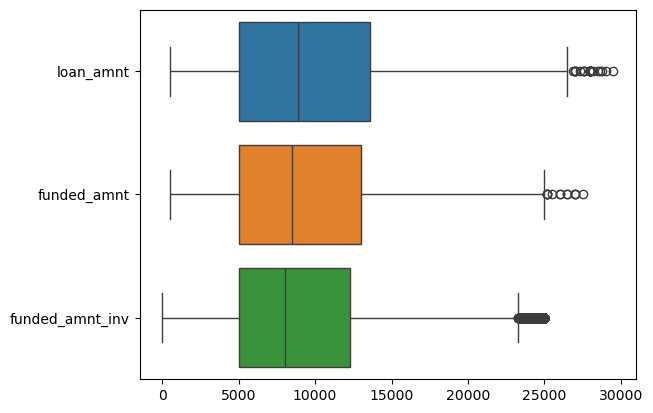

In [649]:
sns.boxplot([data['loan_amnt'], data['funded_amnt'], data['funded_amnt_inv']], orient="h")
plt.show()

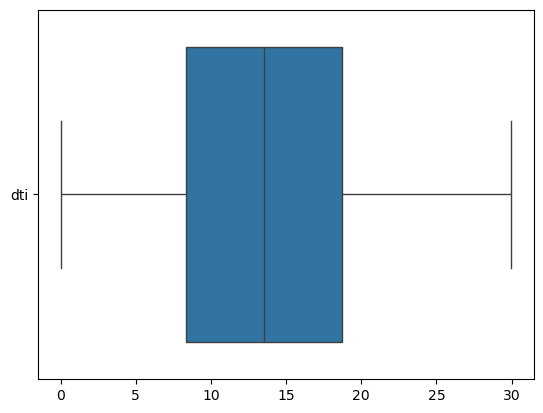

In [650]:
sns.boxplot([data['dti']], orient="h")
plt.show()

### Categorizing the columns
Since the columns `loan_amnt`, `funded_amnt`, and `funded_amnt_inv`,  `int_rate` contain numeric values, analyzing them as discrete values 
can be challenging. It would be more effective to categorize them into buckets for easier analysis.
 So lets bucketize the columns into a new columns

In [653]:
data.loan_amnt.describe()

count    33193.000000
mean      9771.728226
std       5748.814573
min        500.000000
25%       5000.000000
50%       8875.000000
75%      13600.000000
max      29500.000000
Name: loan_amnt, dtype: float64

In [655]:
# From above data for loan_amt we can see that most of the loan amout are between 5k to 13k (25% - 75%) quartile
# So lets bucktize them as follow:
# [0-5k] , (5k - 10k], (10k-15k], >15

In [659]:
def BucketizeLoanAmount(val):
    if val <= 5000:
        return "0-5k"
    elif val >5000 and val <=10000:
        return "5k-10k"
    elif val >10000 and val <=15000:
        return "10k-15k"
    else:
        return "15k-above"
data['loan_amnt_bucket'] = data['loan_amnt'].apply(BucketizeLoanAmount)
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,issue_d,loan_status,purpose,addr_state,dti,pub_rec,pub_rec_bankruptcies,issue_month,issue_year,loan_amnt_bucket
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,...,Dec-11,Fully Paid,credit_card,AZ,27.65,0,0.0,12,2011,0-5k
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,...,Dec-11,Charged Off,car,GA,1.00,0,0.0,12,2011,0-5k
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,...,Dec-11,Fully Paid,small_business,IL,8.72,0,0.0,12,2011,0-5k
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,...,Dec-11,Fully Paid,other,CA,20.00,0,0.0,12,2011,5k-10k
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,...,Dec-11,Fully Paid,wedding,AZ,11.20,0,0.0,12,2011,0-5k


In [661]:
data.int_rate.describe()

count    33193.000000
mean        11.773443
std          3.586094
min          5.420000
25%          8.900000
50%         11.710000
75%         14.260000
max         22.110000
Name: int_rate, dtype: float64

In [663]:
# From above data for `int_rate` we can see that the most of the int_rate are between 8 to 14 (0.25 - 0.75) quartile
# So lets bucktize them as follow:
# int_rate <= 8: very low
# 8 < int_rate <= 12 : low
# 12 < int_rate <= 16 : moderate
# 16 < int_rate <=20 : high
# int_rate > 20 : very high


In [665]:
def BucketizeInterestRate(val):
    if val <= 8:
        return "Very low"
    elif val >8 and val <=12:
        return "Low"
    elif val >12 and val <=16:
        return "Moderate"
    elif val >16 and val <= 20:
        return "High"
    elif val >20:
        return "Very high"

data['int_rate_bucket'] = data['int_rate'].apply(BucketizeInterestRate)
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,loan_status,purpose,addr_state,dti,pub_rec,pub_rec_bankruptcies,issue_month,issue_year,loan_amnt_bucket,int_rate_bucket
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,...,Fully Paid,credit_card,AZ,27.65,0,0.0,12,2011,0-5k,Low
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,...,Charged Off,car,GA,1.00,0,0.0,12,2011,0-5k,Moderate
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,...,Fully Paid,small_business,IL,8.72,0,0.0,12,2011,0-5k,Moderate
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,...,Fully Paid,other,CA,20.00,0,0.0,12,2011,5k-10k,Moderate
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,...,Fully Paid,wedding,AZ,11.20,0,0.0,12,2011,0-5k,Very low


In [667]:
data.annual_inc.describe()

count     33193.000000
mean      60167.254229
std       27392.575296
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      145992.000000
Name: annual_inc, dtype: float64

In [669]:
# From above data for annual_inc we can see that the most of the annual_inc are between ~40k to 75k (25% - 75%) quartile
# So lets bucketize them as follows:
# [0-40k] , (40k - 50k]. (50k-60k], (60k-70k], (70k-80k], (80k-above]

In [671]:
def BucketizeAnnualIncomeAmount(val):
    if val <= 40000:
        return "0-40k"
    elif val >40000 and val <=50000:
        return "40k-50k"
    elif val >50000 and val <=60000:
        return "50k-60k"
    elif val >60000 and val <= 70000:
        return "60k-70k"
    elif val >70000 and val <= 80000:
        return "70k-80k"
    else:
        return "80k-above"

data['annual_inc_bucket'] = data['annual_inc'].apply(BucketizeAnnualIncomeAmount)
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,purpose,addr_state,dti,pub_rec,pub_rec_bankruptcies,issue_month,issue_year,loan_amnt_bucket,int_rate_bucket,annual_inc_bucket
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,...,credit_card,AZ,27.65,0,0.0,12,2011,0-5k,Low,0-40k
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,...,car,GA,1.00,0,0.0,12,2011,0-5k,Moderate,0-40k
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,...,small_business,IL,8.72,0,0.0,12,2011,0-5k,Moderate,0-40k
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,...,other,CA,20.00,0,0.0,12,2011,5k-10k,Moderate,40k-50k
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,...,wedding,AZ,11.20,0,0.0,12,2011,0-5k,Very low,0-40k


In [673]:
data.dti.describe()

count    33193.000000
mean        13.448420
std          6.649824
min          0.000000
25%          8.350000
50%         13.550000
75%         18.720000
max         29.990000
Name: dti, dtype: float64

In [675]:
# From above data for dti we can see that the most of the annual_inc are between 8 to 18 (25% - 75%) quartile
# So lets bucketize them as follows:
# [0-8]: very Low,  (8 - 12]: low,  (12-16]: moderate,  (16,20]: high, >20 : Very high

In [677]:
def BucketizeDTI(val):
    if val <= 8:
        return "Very low"
    elif val >8 and val <=12:
        return "Low"
    elif val >12 and val <=16:
        return "Moderate"
    elif val >16 and val <= 20:
        return "High"
    else:
        return "Very high"

data['dti_bucket'] = data['dti'].apply(BucketizeDTI)
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,addr_state,dti,pub_rec,pub_rec_bankruptcies,issue_month,issue_year,loan_amnt_bucket,int_rate_bucket,annual_inc_bucket,dti_bucket
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,...,AZ,27.65,0,0.0,12,2011,0-5k,Low,0-40k,Very high
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,...,GA,1.00,0,0.0,12,2011,0-5k,Moderate,0-40k,Very low
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,...,IL,8.72,0,0.0,12,2011,0-5k,Moderate,0-40k,Low
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,...,CA,20.00,0,0.0,12,2011,5k-10k,Moderate,40k-50k,High
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,...,AZ,11.20,0,0.0,12,2011,0-5k,Very low,0-40k,Low


### Before going to do any analysis lets see which columns we are left with 

In [680]:
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'pub_rec', 'pub_rec_bankruptcies',
       'issue_month', 'issue_year', 'loan_amnt_bucket', 'int_rate_bucket',
       'annual_inc_bucket', 'dti_bucket'],
      dtype='object')

In [682]:
# Columns: length = 25
# Date-time : [issue_d , issue_month, issue_year,  ]
# Numerical : [ loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate , installment, annual_inc, dti ]
# Categorical : [ grade, sub_grade, emp_length, home_ownership, verification_status, loan_status, purpose, addr_state, pub_rec, 
#                pub_rec_bankruptcies, loan_amnt_bucket, int_rate_bucket,  annual_inc_bucket, dti_bucket ]
# Target variable : [ loan_status ]

In [684]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,addr_state,dti,pub_rec,pub_rec_bankruptcies,issue_month,issue_year,loan_amnt_bucket,int_rate_bucket,annual_inc_bucket,dti_bucket
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,...,AZ,27.65,0,0.0,12,2011,0-5k,Low,0-40k,Very high
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,...,GA,1.00,0,0.0,12,2011,0-5k,Moderate,0-40k,Very low
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,...,IL,8.72,0,0.0,12,2011,0-5k,Moderate,0-40k,Low
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,...,CA,20.00,0,0.0,12,2011,5k-10k,Moderate,40k-50k,High
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,...,AZ,11.20,0,0.0,12,2011,0-5k,Very low,0-40k,Low


# 4. Univariate Analysis

In [687]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33193 entries, 0 to 39680
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             33193 non-null  int64  
 1   funded_amnt           33193 non-null  int64  
 2   funded_amnt_inv       33193 non-null  float64
 3   term                  33193 non-null  int64  
 4   int_rate              33193 non-null  float64
 5   installment           33193 non-null  float64
 6   grade                 33193 non-null  object 
 7   sub_grade             33193 non-null  object 
 8   emp_length            33193 non-null  int64  
 9   home_ownership        33193 non-null  object 
 10  annual_inc            33193 non-null  float64
 11  verification_status   33193 non-null  object 
 12  issue_d               33193 non-null  object 
 13  loan_status           33193 non-null  object 
 14  purpose               33193 non-null  object 
 15  addr_state            33

### a. Analyzing loan status

In [690]:
data.loan_status.value_counts()

loan_status
Fully Paid     28494
Charged Off     4699
Name: count, dtype: int64

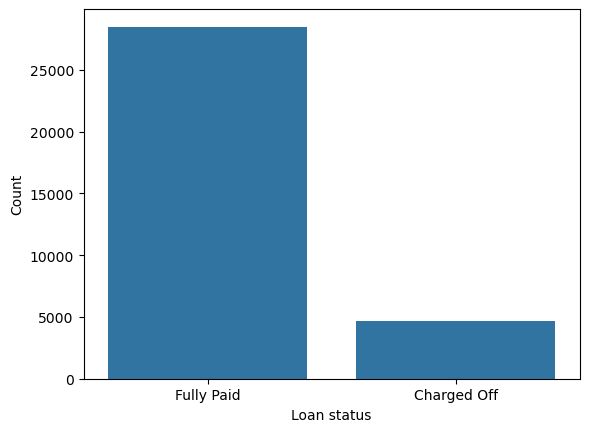

In [692]:
sns.countplot(data = data, x= 'loan_status')
plt.xlabel("Loan status")
plt.ylabel("Count")
plt.show()

In [693]:
percent_charged_off = round(len(data[data['loan_status'] == "Charged Off"])/ len(data)*100 ,2)
print("percent of application whihch has  defaulted :", percent_charged_off)

percent of application whihch has  defaulted : 14.16


#### Observation : 14.16% of loan in the data set has defaulted

### b. Analysis of loan amount

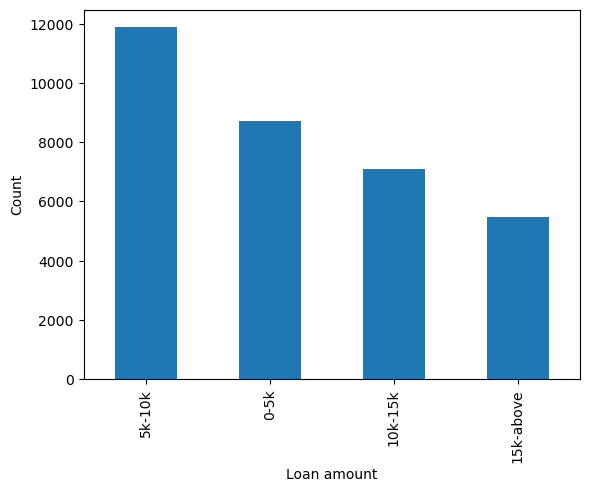

In [698]:
data.loan_amnt_bucket.value_counts().plot.bar()
plt.xlabel("Loan amount")
plt.ylabel("Count")
plt.show()

##### Observation  : Loan amount between 5000 -10000 is most applied for

### c. Analysis of home ownership of applicants

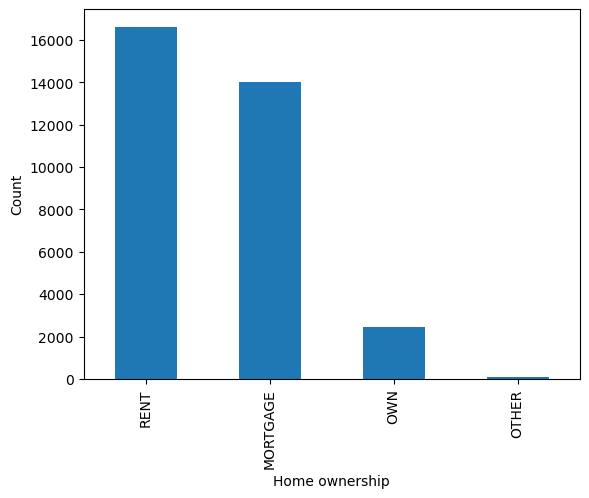

In [702]:
data.home_ownership.value_counts().plot.bar()
plt.xlabel("Home ownership")
plt.ylabel("Count")
plt.show()

##### Observation : Majority of the applicants are ether living on rent or are on mortgage

### d. Analysis of annual income of the applicants

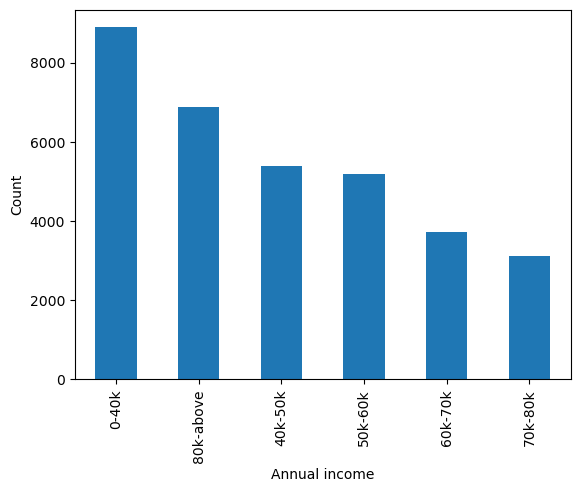

In [706]:
data.annual_inc_bucket.value_counts().plot.bar()
plt.xlabel("Annual income")
plt.ylabel("Count")
plt.show()

##### Observation : Majority of the applicants has income between 0-40k 

### e. Analysis of purpose of applying for loan

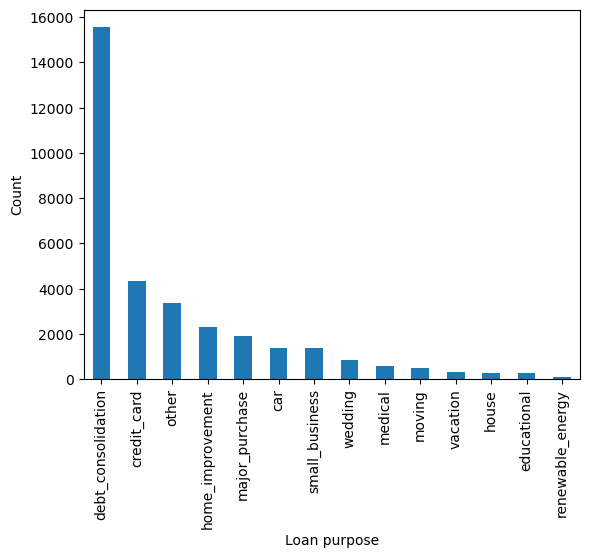

In [710]:
data.purpose.value_counts().plot.bar()
plt.xlabel("Loan purpose")
plt.ylabel("Count")
plt.show()

##### Observation : Most of the applicants apply for loan for the debt consolidation followed by settlement of credit card 

### f. Analysis of applicants location

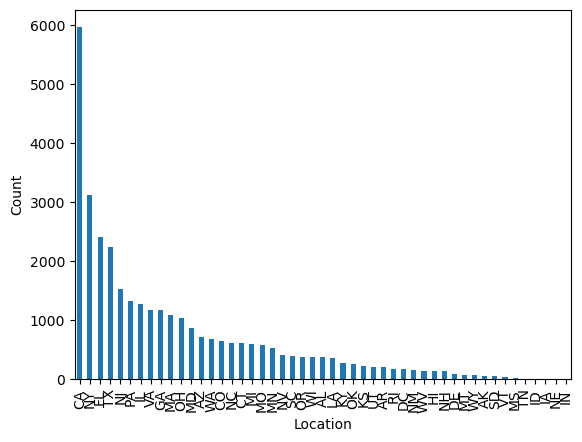

In [714]:
data.addr_state.value_counts().plot.bar()
plt.xlabel("Location")
plt.ylabel("Count")
plt.show()

##### Observation : State CA has most number of the applicants

###  g. Analysis of interest rate of the loan

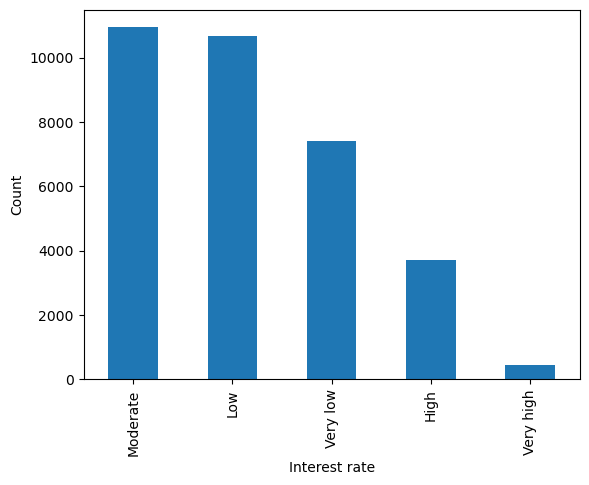

In [718]:
data.int_rate_bucket.value_counts().plot.bar()
plt.xlabel("Interest rate")
plt.ylabel("Count")
plt.show()

##### Observation : Most of the applicants have either low (<8%) or moderate(12% to 16%) interest rate. 

### h. Analysis of the month for loan application

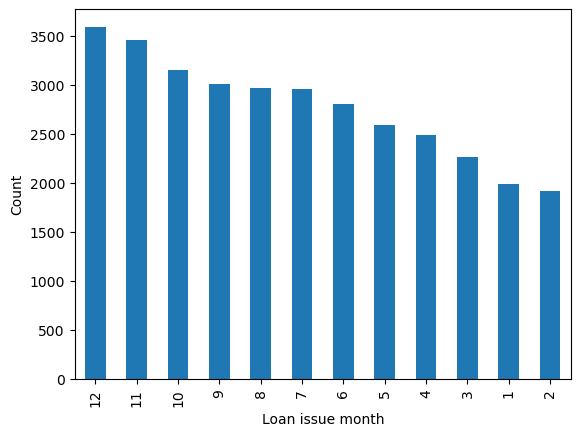

In [722]:
data.issue_month.value_counts().plot.bar()
plt.xlabel("Loan issue month")
plt.ylabel("Count")
plt.show()

##### Observation : Most of the loans were availed in the month of Nov or Dec

### i. Analysis of the loan application year

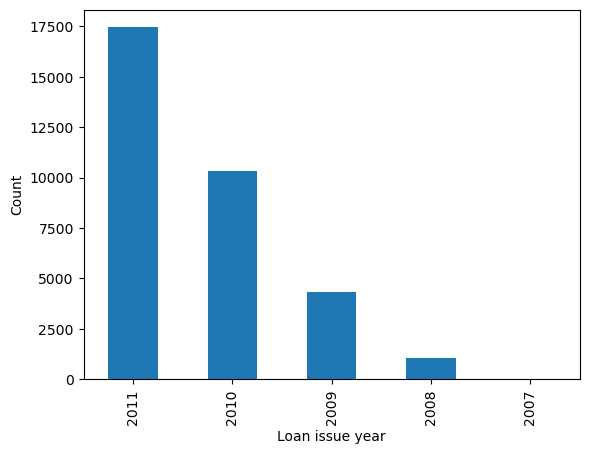

In [726]:
data.issue_year.value_counts().plot.bar()
plt.xlabel("Loan issue year")
plt.ylabel("Count")
plt.show()

##### Observation : In year 2011 the loan application was highest

### j. Analyzing verification status

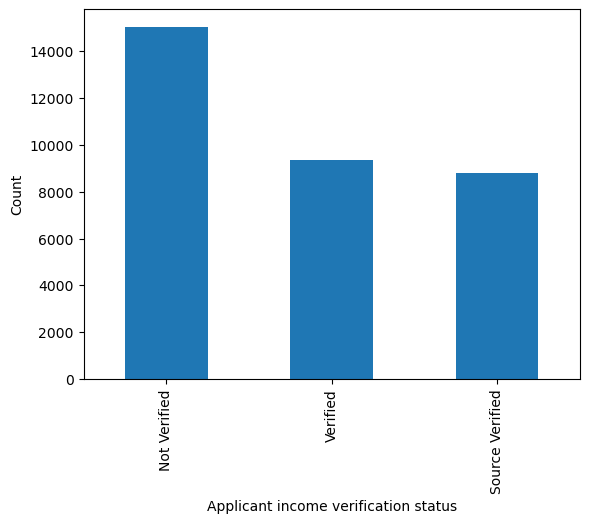

In [730]:
data.verification_status.value_counts().plot.bar()
plt.xlabel("Applicant income verification status")
plt.ylabel("Count")
plt.show()

##### Observation : Applicants whose income was not verified by LC were the most.

### k. Analysis of Loan term 

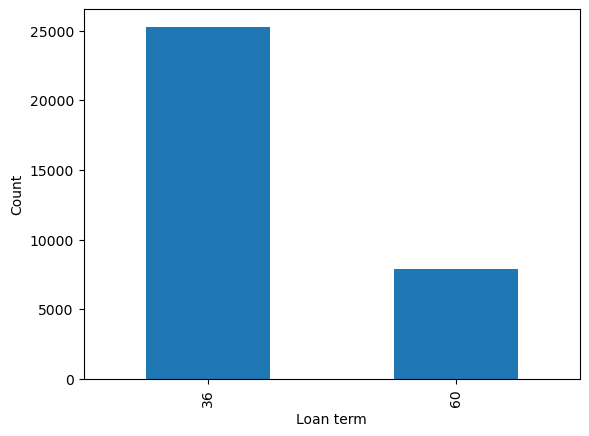

In [734]:
data.term.value_counts().plot.bar()
plt.xlabel("Loan term")
plt.ylabel("Count")
plt.show()

##### Observation : Most of the applicants took loan for the term of 36 months 

# 5. Bi-Variate analysis

In [738]:
# Lets filter the data by "Charged Off" and term it as data_defaulted
#data_defaulted = data[ data['loan_status'] == "Charged Off"]

In [740]:
# In this we will compare how various columns behaves with loan_status column. We will try to plot the percentage value on the 
# bar plot as the count of each columns value doesn't give us clear comparision between them.
# Lets creat a general function to plot bar plot for each column comparison with loan_status

In [742]:
def Plot(data, column1, column2):
    column_vs_loan_status = data.groupby([column1, column2]).loan_status.count().unstack().fillna(0).reset_index()
    column_vs_loan_status['Total'] = column_vs_loan_status["Charged Off"] + column_vs_loan_status["Fully Paid"]
    column_vs_loan_status['Percentage Defaulted'] = (column_vs_loan_status["Charged Off"] / column_vs_loan_status["Total"])*100
    column_vs_loan_status.sort_values('Percentage Defaulted', ascending=False)
    #print(column_vs_loan_status)
    sns.barplot(data = column_vs_loan_status, x= column1, y= "Percentage Defaulted")

### a. Annual income vs default loan status

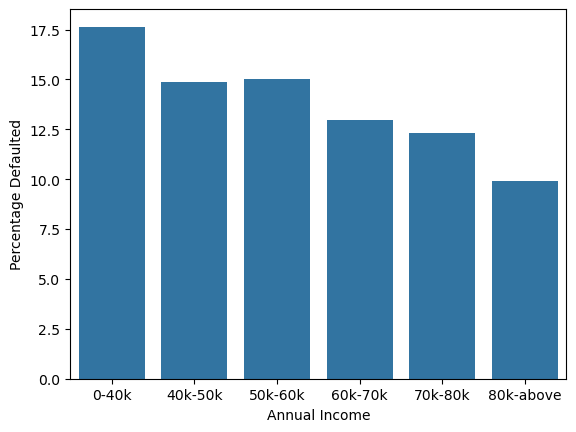

In [745]:
plt.xlabel("Annual Income")
Plot(data, "annual_inc_bucket", "loan_status")


##### Observation : Applicant with annual income in range 0-40k are most defaulted one

### b. Interest rate vs Default loan status

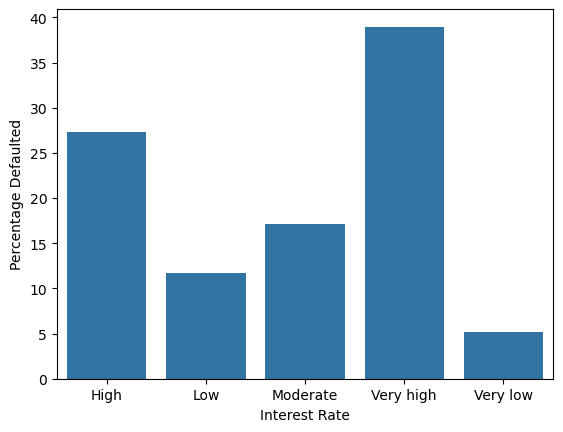

In [749]:
plt.xlabel("Interest Rate")
Plot(data, "int_rate_bucket", "loan_status" )

##### Observation : Applicant whose intrest rate is high : > 20% are more likely to be defaulted.

### c . Loan term Vs Defaulted loan status

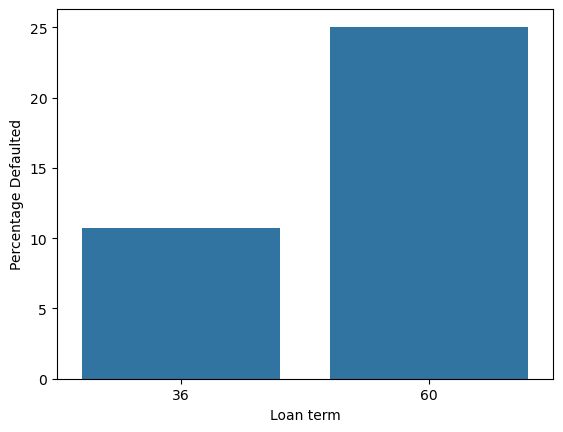

In [753]:
plt.xlabel("Loan term")
Plot(data, "term", "loan_status")

##### Observation : In the above plot for `term` vs `loan status` we can see that applicants who took loan for 60 months term are the one who are most defaulted.

### d. Loan amount vs Defaulted loan status

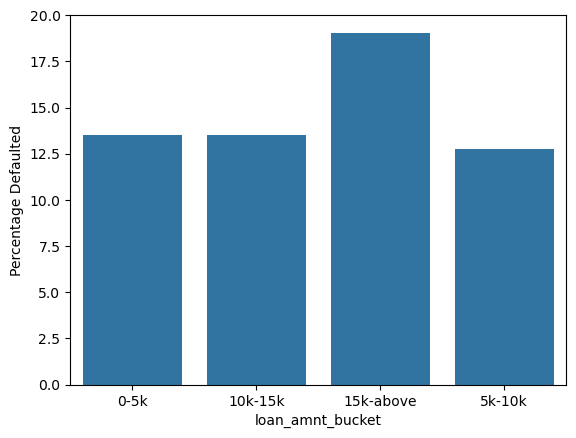

In [757]:
Plot(data, "loan_amnt_bucket", "loan_status")

##### Observation : It is observed that the applicant whose loan amount is in range of >15k are the ones who are most defaulted.

### e. Home ownership Vs Default loan status

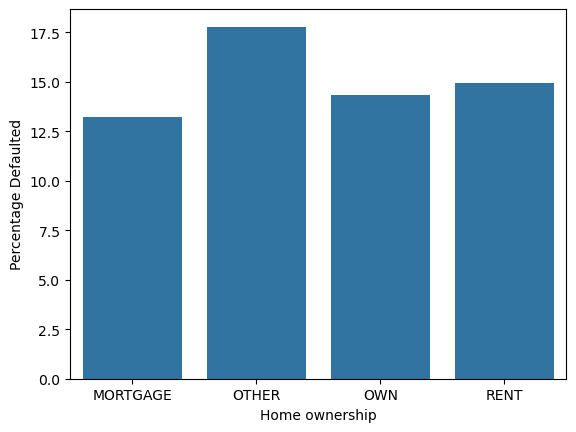

In [761]:
plt.xlabel("Home ownership")
Plot(data, "home_ownership", "loan_status")

##### Observation : From home ownership, we cannot get clear indication if the applicant will be defaulted.

### f. Employee length Vs Default loan status

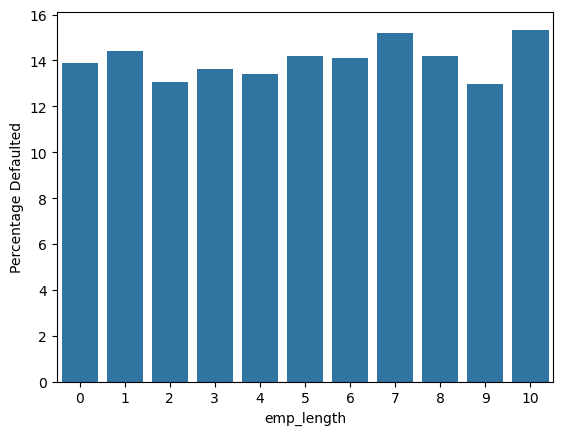

In [765]:
Plot(data, "emp_length", "loan_status")

##### Observation : Employee length doesn't give clear indication of the applicants loan status.

### g. Loan purpose vs loan status

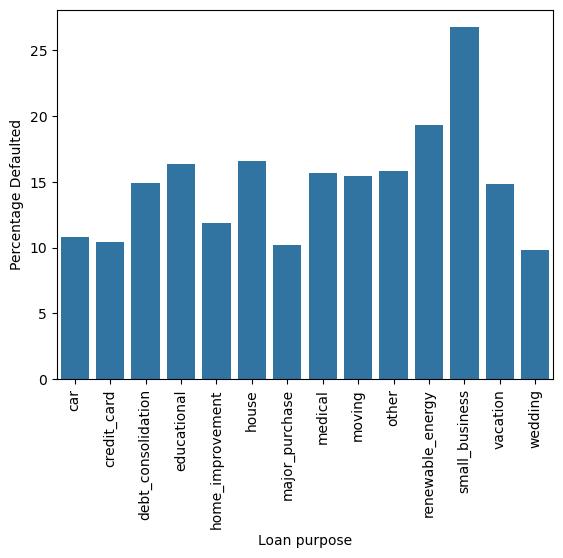

In [769]:
plt.xticks(rotation=90) 
plt.xlabel("Loan purpose")
Plot(data, "purpose", "loan_status")

#### Observation : People who availed loan for small businesses are the one who are defaulted more.

### h. Issue month, year Vs Loan status

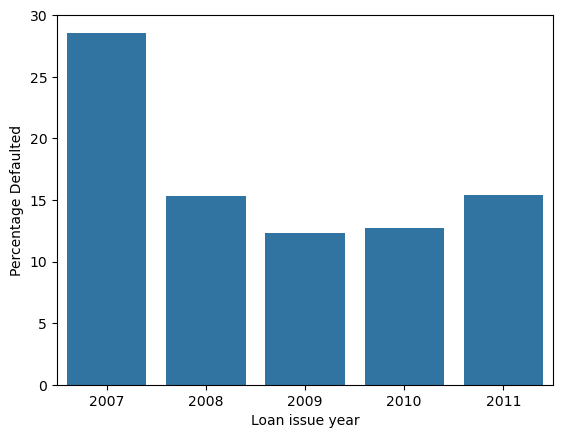

In [773]:
plt.xlabel("Loan issue year")
Plot(data, "issue_year", "loan_status" )

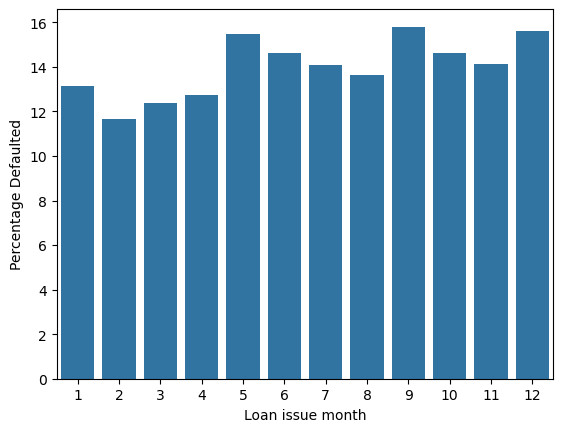

In [774]:
plt.xlabel("Loan issue month")
Plot(data, "issue_month", "loan_status" )

#### Observation : Defaulted Loan issued in year 2007 was highest and the loans which are issued in month of sept to dec are mostly defaulted

### i. Applicants verification status VS default loan status

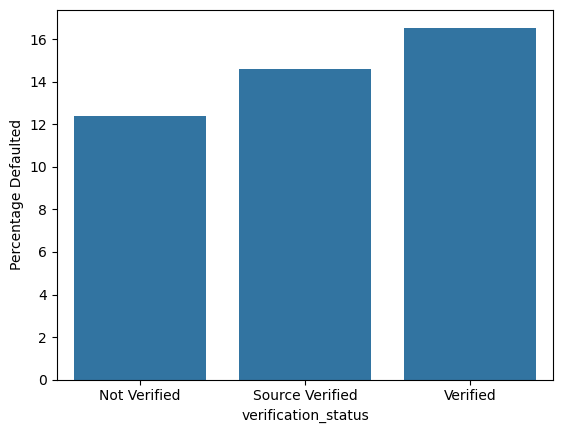

In [779]:
Plot(data, "verification_status", "loan_status")

#### Observation : We don't get much insight from the income verification of the applicant.

### j. Grade VS loan status

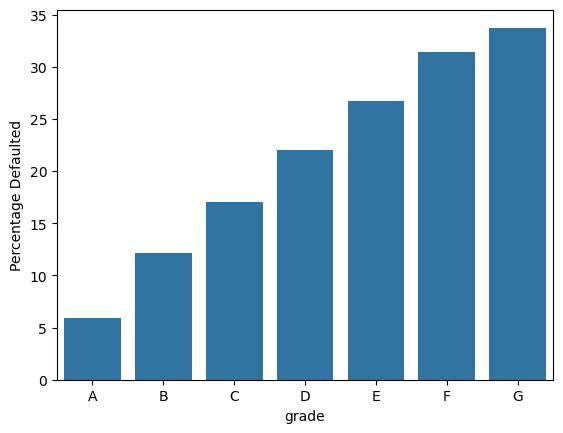

In [783]:
Plot(data, "grade", "loan_status")

##### Observation : Grade G more more defaulted

### k. Addresss State Vs Loan status

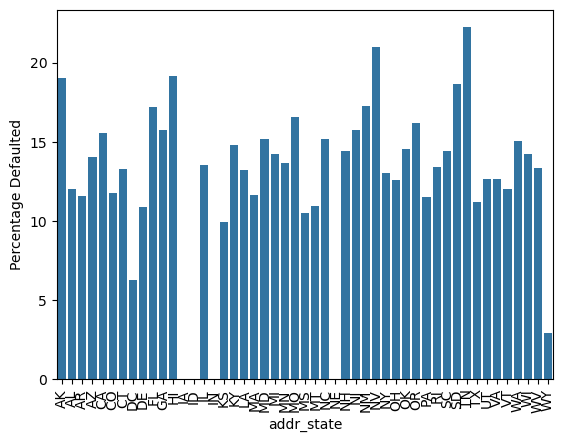

In [787]:
plt.xticks(rotation=90) 
Plot(data, "addr_state", "loan_status")

#### Observation : If applicant is from state TX then more chances of loan getting default

### l. Public record bankrupticies Vs Loan status

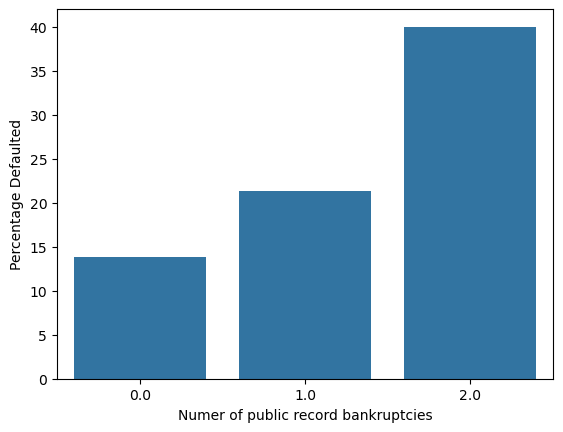

In [791]:
plt.xlabel("Numer of public record bankruptcies")
Plot(data, "pub_rec_bankruptcies", "loan_status")

#### Obseervation : If applicant has gone banlrupticies more than once then it is more likely that applicant will go default.

### m. dti_bucket Vs Loan status

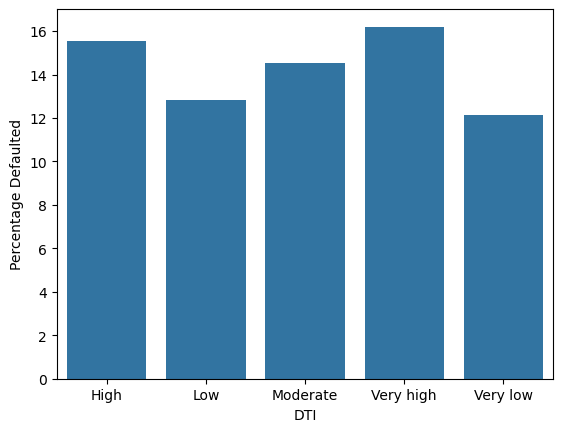

In [795]:
plt.xlabel("DTI")
Plot(data, "dti_bucket", "loan_status")

#### Observation : High DTI means high changes of loan getting default

### **Observations**:
The analysis of charged-off loans for each variable indicates the following. The likelihood of default increases when:

- Applicant has annual income in range 0-40k 
- Applicant's intrest rate is very hig : > 20% 
- Loan term is of 60 months
- Loan amount is more than 15k
- Applicants use the loan for small businesses
- Loan is issued in year 2007 or in month of sept to dec
- Applicant is from TX state
- Applicant has more that 1 bankruptcies in past
- DTI is more than 20%


### 6. Multi-Variate analysis

In [800]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,addr_state,dti,pub_rec,pub_rec_bankruptcies,issue_month,issue_year,loan_amnt_bucket,int_rate_bucket,annual_inc_bucket,dti_bucket
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,...,AZ,27.65,0,0.0,12,2011,0-5k,Low,0-40k,Very high
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,...,GA,1.00,0,0.0,12,2011,0-5k,Moderate,0-40k,Very low
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,...,IL,8.72,0,0.0,12,2011,0-5k,Moderate,0-40k,Low
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,...,CA,20.00,0,0.0,12,2011,5k-10k,Moderate,40k-50k,High
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,...,AZ,11.20,0,0.0,12,2011,0-5k,Very low,0-40k,Low


In [802]:
# Lets try to find the correaltion between the columns

In [804]:
data = data [["loan_amnt", "funded_amnt", "funded_amnt_inv", "int_rate","installment", "emp_length" , "annual_inc" , "dti" ]]

<Axes: >

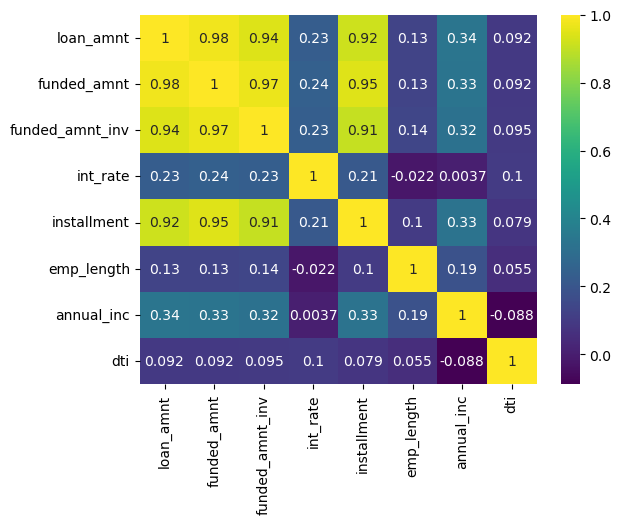

In [806]:
sns.heatmap(data.corr(), annot=True, cmap='viridis')